## Bibliotecas

In [28]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

## Leitura dos dados

In [7]:
df = pd.read_csv('chuva_vazao_cota_CAIANA.csv', index_col='Data', parse_dates=['Data']).dropna()

In [8]:
df

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao
Data,,,,,,,,,
2023-04-30,2041005,1,0.3,57700000,1,69.5,57700000,1,7.3723
2023-04-29,2041005,1,32.1,57700000,1,69.0,57700000,1,7.2248
2023-04-28,2041005,1,0.0,57700000,1,69.0,57700000,1,7.2248
2023-04-27,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040
2023-04-26,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040
...,...,...,...,...,...,...,...,...,...
1939-10-31,2041005,2,0.0,57700000,2,66.0,57700000,2,1.9600
1939-10-30,2041005,2,0.0,57700000,2,67.0,57700000,2,2.0318
1939-10-29,2041005,2,0.0,57700000,2,67.0,57700000,2,2.0318


## Análise Exploratória

In [87]:
df.describe()

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao
count,29744.0,29744.000000,29744.000000,29744.0,29744.000000,29744.000000,29744.0,29744.000000,29744.000000
mean,2041005.0,1.374731,3.681657,57700000.0,1.774408,108.469002,57700000.0,1.899711,7.001740
std,0.0,0.484062,10.173875,0.0,0.417978,48.181534,0.0,0.300390,6.789427
min,2041005.0,1.000000,0.000000,57700000.0,1.000000,32.000000,57700000.0,1.000000,0.657400
25%,2041005.0,1.000000,0.000000,57700000.0,2.000000,73.000000,57700000.0,2.000000,3.392800
50%,2041005.0,1.000000,0.000000,57700000.0,2.000000,99.000000,57700000.0,2.000000,4.942400
75%,2041005.0,2.000000,0.500000,57700000.0,2.000000,132.000000,57700000.0,2.000000,8.120200
max,2041005.0,2.000000,148.000000,57700000.0,2.000000,500.000000,57700000.0,2.000000,162.980700


In [106]:
# Filtro de data
filtered_df = df.loc[(df.index >= '2022-01-01')
                     & (df.index < '2023-01-01')]

<Axes: xlabel='Data'>

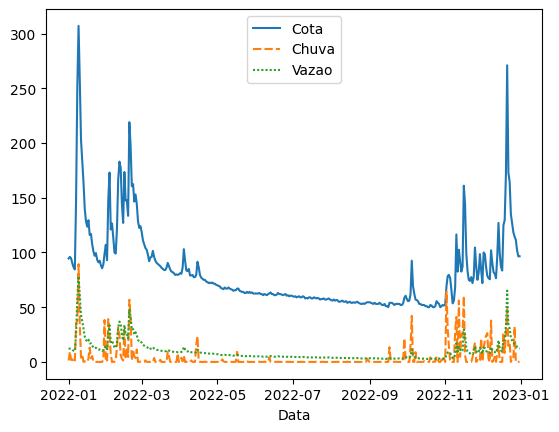

In [107]:
sns.lineplot(data=filtered_df[['Cota', 'Chuva','Vazao']])

### Histogramas

<Axes: xlabel='Cota', ylabel='Count'>

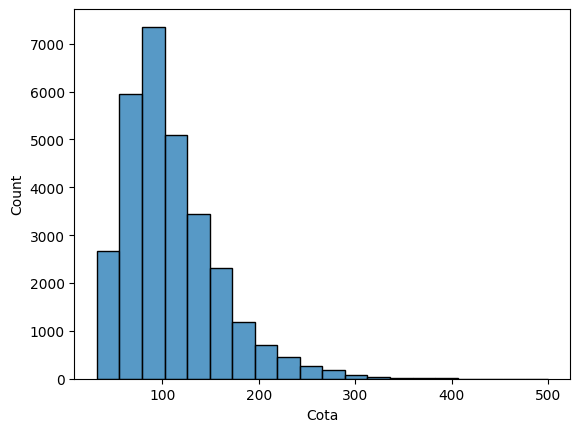

In [7]:
sns.histplot(df['Cota'],bins=20)

<Axes: xlabel='Vazao', ylabel='Count'>

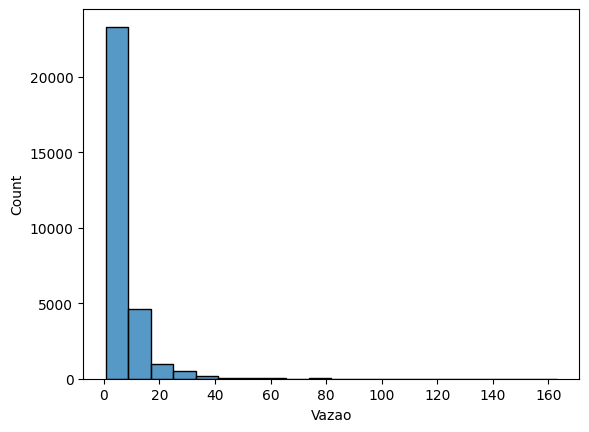

In [8]:
sns.histplot(df['Vazao'],bins=20)

<Axes: xlabel='Chuva', ylabel='Count'>

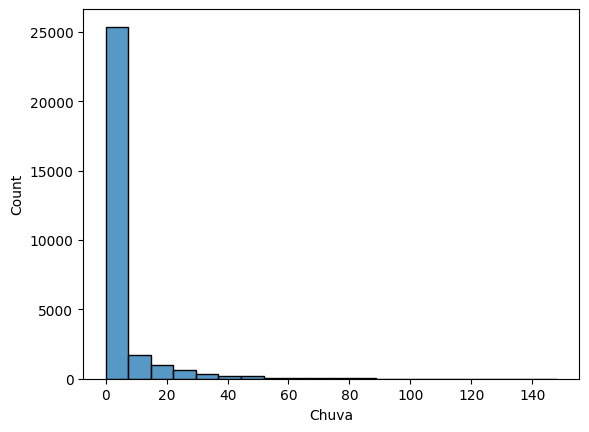

In [9]:
sns.histplot(df['Chuva'],bins=20)

### Distribuição

<Axes: xlabel='Vazao', ylabel='Density'>

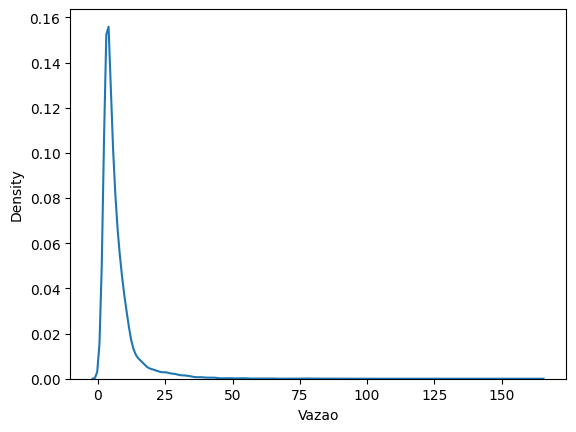

In [10]:
sns.kdeplot(df['Vazao'])

<Axes: xlabel='Cota', ylabel='Density'>

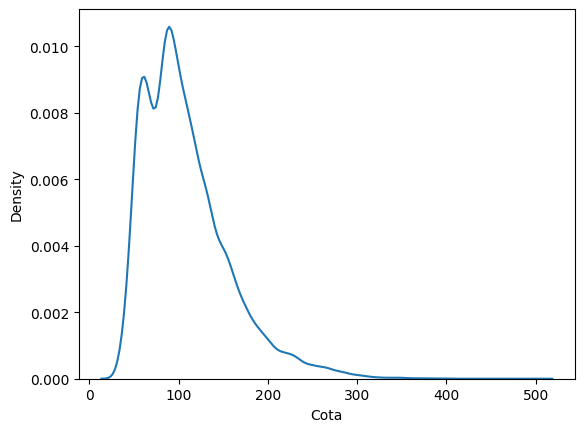

In [11]:
sns.kdeplot(df['Cota'])

<Axes: xlabel='Chuva', ylabel='Density'>

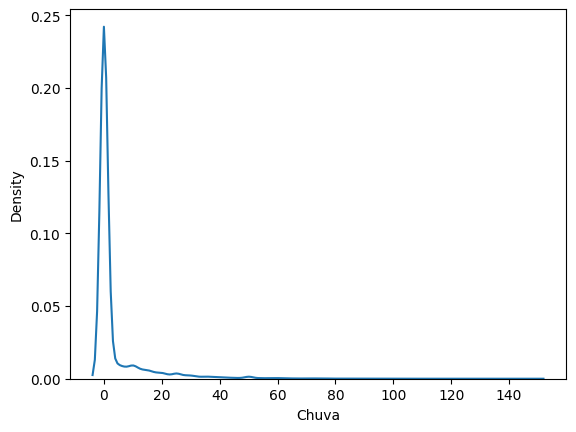

In [12]:
sns.kdeplot(df['Chuva'])

### Correlação

In [13]:
df_5000 = df.sample(5000, random_state=0)

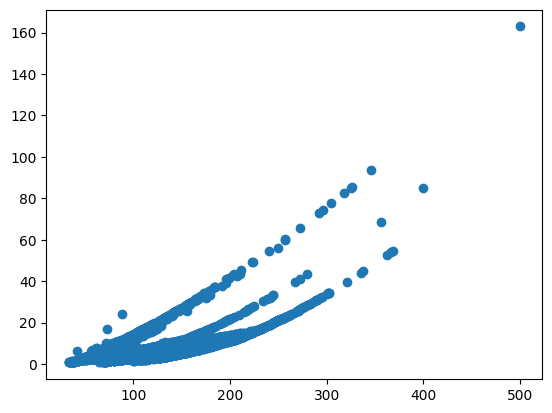

In [30]:
plt.scatter(df_5000['Cota'], df_5000['Vazao'])

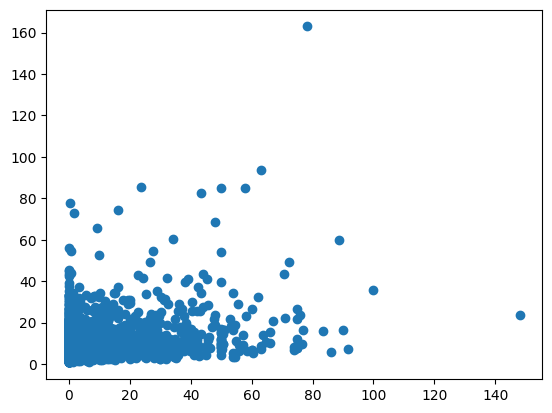

In [29]:
plt.scatter(df_5000['Chuva'], df_5000['Vazao'])

#### Covariância

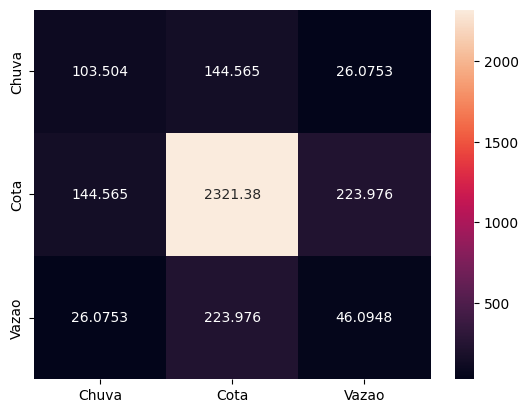

In [32]:
cov = np.cov(np.array([df.Chuva, df.Cota, df.Vazao]), bias=True)
labs = ['Chuva', 'Cota', 'Vazao']

sns.heatmap(cov, annot=True, fmt='g', xticklabels=labs, yticklabels=labs)
plt.show()

#### Pearson

In [13]:
df[['Chuva', 'Cota', 'Vazao']].corr(method='pearson')

,Chuva,Cota,Vazao
Chuva,1.000000,0.294925,0.377506
Cota,0.294925,1.000000,0.684702
Vazao,0.377506,0.684702,1.000000


#### Spearman

In [14]:
df[['Chuva', 'Cota', 'Vazao']].corr(method='spearman')

,Chuva,Cota,Vazao
Chuva,1.000000,0.236925,0.367592
Cota,0.236925,1.000000,0.628762
Vazao,0.367592,0.628762,1.000000


## Previsão com série temporal

In [9]:
df['Lag_1'] = df['Vazao'].shift(-1)

In [10]:
df

,EstacaoCodigo_chuva,NivelConsistencia_chuva,Chuva,EstacaoCodigo_cota,NivelConsistencia_cota,Cota,EstacaoCodigo_vazao,NivelConsistencia_vazao,Vazao,Lag_1
Data,,,,,,,,,,
2023-04-30,2041005,1,0.3,57700000,1,69.5,57700000,1,7.3723,7.2248
2023-04-29,2041005,1,32.1,57700000,1,69.0,57700000,1,7.2248,7.2248
2023-04-28,2041005,1,0.0,57700000,1,69.0,57700000,1,7.2248,5.9040
2023-04-27,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,5.9040
2023-04-26,2041005,1,0.0,57700000,1,64.0,57700000,1,5.9040,6.0080
...,...,...,...,...,...,...,...,...,...,...
1939-10-31,2041005,2,0.0,57700000,2,66.0,57700000,2,1.9600,2.0318
1939-10-30,2041005,2,0.0,57700000,2,67.0,57700000,2,2.0318,2.0318
1939-10-29,2041005,2,0.0,57700000,2,67.0,57700000,2,2.0318,2.1782


Text(0.5, 1.0, 'Lag Plot de Vazao')

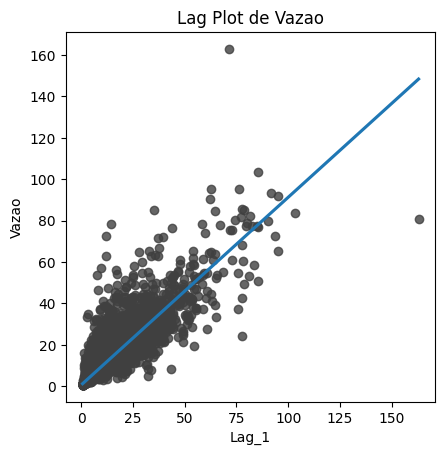

In [105]:
fig, ax = plt.subplots()
ax = sns.regplot(x='Lag_1', y='Vazao', data=df, ci=None, scatter_kws=dict(color='0.25'))
ax.set_aspect('equal')
ax.set_title('Lag Plot de Vazao')

In [36]:
# Pipeline
pipe = make_pipeline(
    StandardScaler(),
    RandomForestRegressor(random_state=0, n_jobs=-1))

# Divide os dados
X = df[['Chuva', 'Cota', 'Lag_1']].dropna() 
y = df.Vazao
y, X = y.align(X, join='inner') 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# Treinamento

pipe = RandomForestRegressor(random_state=0)
pipe.fit(X_train, y_train)
y_pred = pd.Series(pipe.predict(X_test), index=X_test.index)
# Avaliação
mean_absolute_error(y_pred, y_test)

0.6226025429575957

In [41]:
print(f'R2 = {r2_score(pipe.predict(X_test), y_test) :.4f}')

R2 = 0.8879


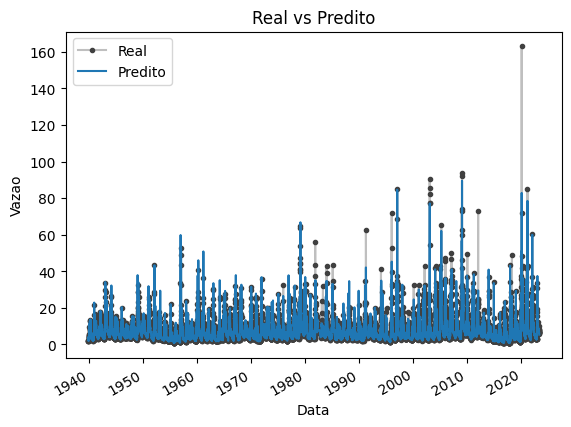

In [57]:
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)
ax = y_test.plot(**plot_params, label='oi')
ax = y_pred.plot(ylabel='Vazao', legend=1)
plt.legend(['Real','Predito']) 
plt.title('Real vs Predito')
plt.show()